In [59]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("awaiskaggler/insurance-csv")
file_path = os.path.join(path, 'insurance.csv')
data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [60]:
import numpy as np
ages = data['age'].values
region = pd.Categorical(data['region'])
mixed_list = [ages[:5], data['sex'].values[:5], "Insurance"]
matrix = np.column_stack((data['age'], data['expenses']))
subset = data[['age', 'expenses', 'region']]
print(subset)

      age  expenses     region
0      19  16884.92  southwest
1      18   1725.55  southeast
2      28   4449.46  southeast
3      33  21984.47  northwest
4      32   3866.86  northwest
...   ...       ...        ...
1333   50  10600.55  northwest
1334   18   2205.98  northeast
1335   18   1629.83  southeast
1336   21   2007.95  southwest
1337   61  29141.36  northwest

[1338 rows x 3 columns]


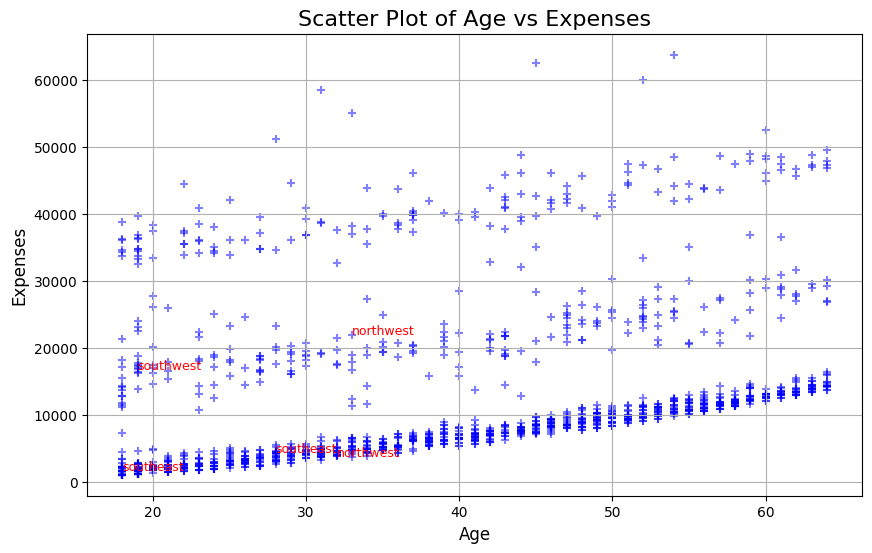

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['expenses'], color='blue', alpha=0.5, marker='+')

# Customize the plot
plt.title("Scatter Plot of Age vs Expenses", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Expenses", fontsize=12)

for i in range(5):
    plt.text(data['age'][i], data['expenses'][i], f"{data['region'][i]}", fontsize=9, color='red')

plt.grid(True)
plt.show()


In [62]:
# Step 4: Filter the data based on a condition (age between 20 and 40)
filtered_data = data[(data['age'] >= 20) & (data['age'] <= 40)]

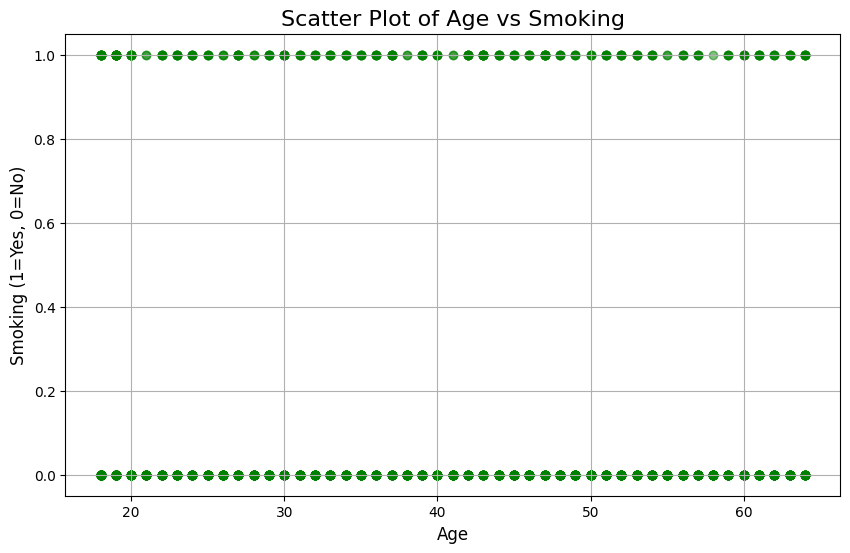

In [63]:
# Scatter plot between age and smoking
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['smoker'].apply(lambda x: 1 if x == 'yes' else 0), color='green', alpha=0.5, marker='o')
plt.title("Scatter Plot of Age vs Smoking", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Smoking (1=Yes, 0=No)", fontsize=12)
plt.grid(True)
plt.show()

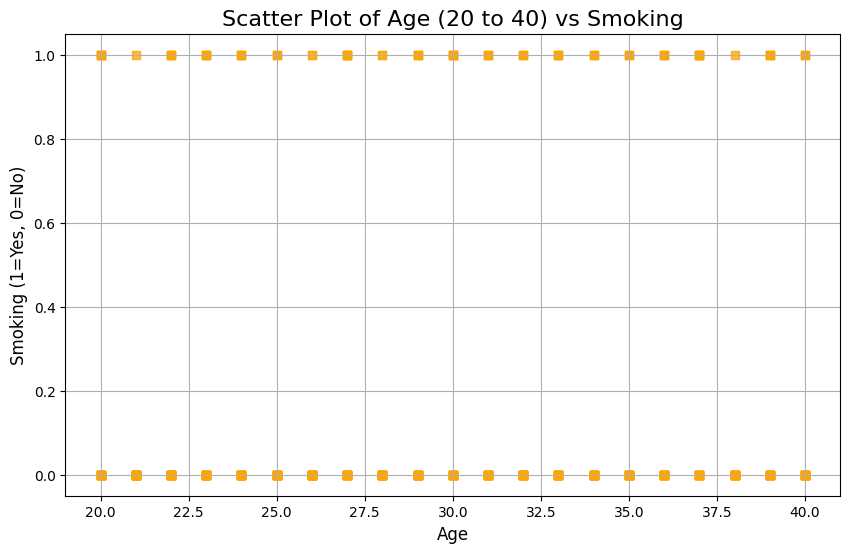

In [64]:
# Scatter plot between age (20 to 40) and smoking
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0), color='orange', alpha=0.5, marker='s')
plt.title("Scatter Plot of Age (20 to 40) vs Smoking", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Smoking (1=Yes, 0=No)", fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-65-ec9206d99a5b>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([smoker_expenses, non_smoker_expenses], labels=['Yes', 'No'])


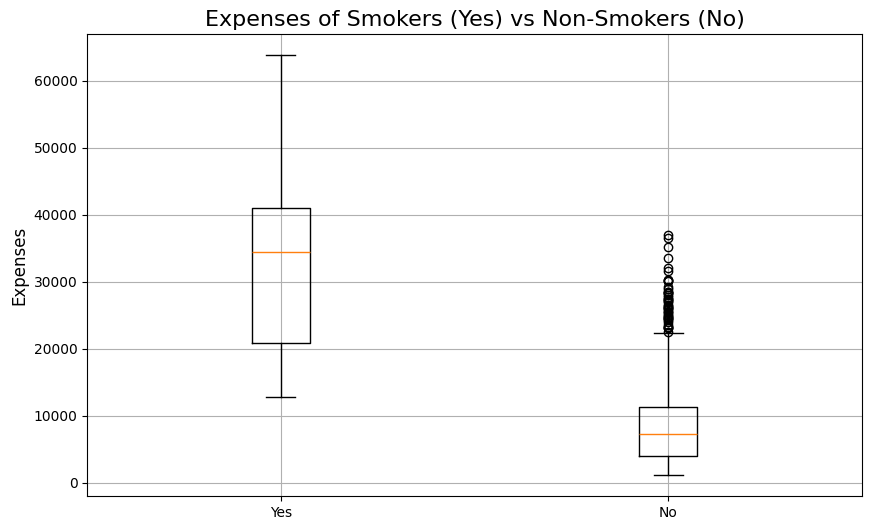

In [65]:
# Step 5: Find expenses of smokers and non-smokers
smoker_expenses = data[data['smoker'] == 'yes']['expenses']
non_smoker_expenses = data[data['smoker'] == 'no']['expenses']

# Plot expenses of smokers and non-smokers with updated labels
plt.figure(figsize=(10, 6))
plt.boxplot([smoker_expenses, non_smoker_expenses], labels=['Yes', 'No'])
plt.title("Expenses of Smokers (Yes) vs Non-Smokers (No)", fontsize=16)
plt.ylabel("Expenses", fontsize=12)
plt.grid(True)
plt.show()


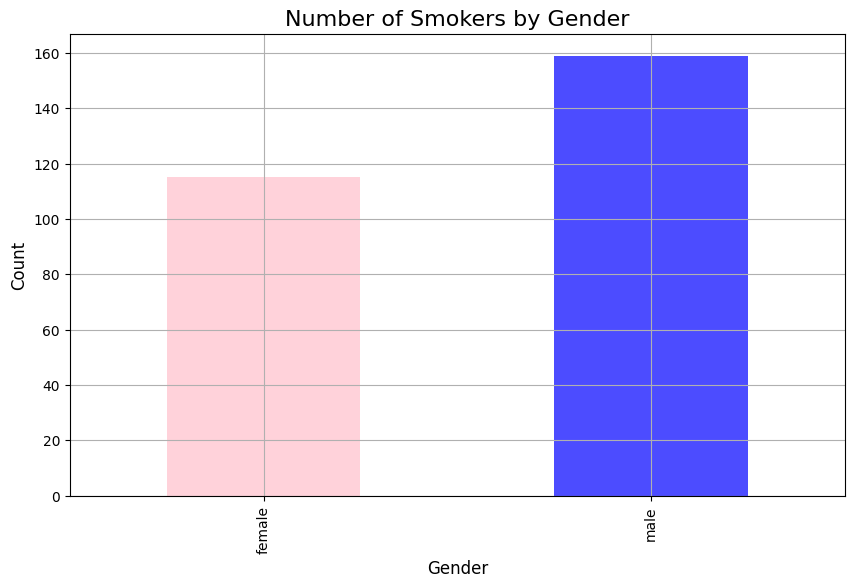

In [66]:
# Step 6: Find the number of smokers gender-wise
smoker_gender_count = data[data['smoker'] == 'yes'].groupby('sex').size()

# Plot the number of smokers gender-wise
plt.figure(figsize=(10, 6))
smoker_gender_count.plot(kind='bar', color=['pink', 'blue'], alpha=0.7)
plt.title("Number of Smokers by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

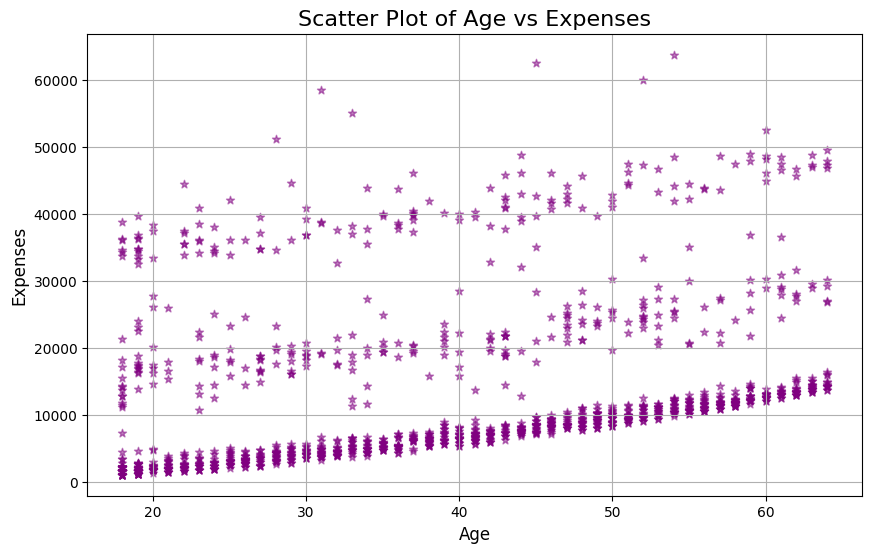

In [67]:
# Step 7: Scatter plot between age and expenses
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['expenses'], color='purple', alpha=0.5, marker='*')
plt.title("Scatter Plot of Age vs Expenses", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Expenses", fontsize=12)
plt.grid(True)
plt.show()

Count of teenage smokers: 30


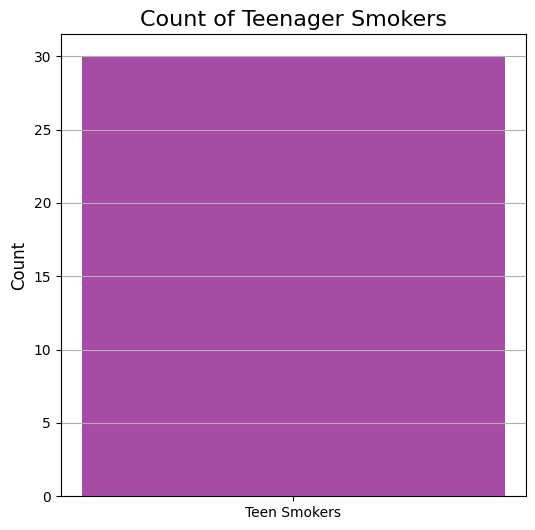

In [68]:
#Count of Teenage Smokers:
teenage_smokers_count = data[(data['age'] >= 13) & (data['age'] <= 19) & (data['smoker'] == 'yes')].shape[0]
print(f"Count of teenage smokers: {teenage_smokers_count}")

plt.figure(figsize=(6, 6))
plt.bar(['Teen Smokers'], [teenage_smokers_count], color='purple', alpha=0.7)
plt.title("Count of Teenager Smokers", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y')
plt.show()